# 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。<br>
《ヒント》<br>
「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [1]:
import numpy as np

list_dice = list(range(1, 7))
roll_dice = np.random.choice(list_dice)
print(roll_dice)

1


# 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。<br>
正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。<br>
刺さった場所（座標）は、配列で保持するようにしてください。

In [2]:
STD = 0.1    #標準偏差
n_darts = 10    #ダーツを投げる回数

x_normal = np.random.normal(roll_dice, STD, n_darts)    #x座標
y_normal = np.random.normal(0, STD, n_darts)    #y座標

coordinate_darts = []
for i in range(n_darts):
    coordinate_elements = [x_normal[i]]
    coordinate_elements.append(y_normal[i])
    coordinate_darts.append(coordinate_elements)

np.set_printoptions(precision=5)
# print(x_normal)
# print(y_normal)

coordinate_darts = np.array([coordinate_darts])

print(coordinate_darts.reshape(n_darts, 2))

[[ 1.0596  -0.09341]
 [ 0.91019  0.01569]
 [ 0.89    -0.11098]
 [ 1.01074 -0.04012]
 [ 1.13928  0.01071]
 [ 1.19258 -0.13216]
 [ 1.11129  0.01591]
 [ 1.06583  0.025  ]
 [ 0.88402  0.05831]
 [ 1.04354  0.04501]]


In [3]:
# np.random.multivariate_normal()　の場合

mean = [0, 0]
cov = [[0.01, 0], [0, 0.01]]

np.random.multivariate_normal(mean, cov, 10)

array([[-0.00879, -0.06668],
       [ 0.10194, -0.06099],
       [-0.06518, -0.02949],
       [ 0.10282,  0.15538],
       [-0.05561, -0.14405],
       [ 0.06597, -0.09561],
       [ 0.06235, -0.05707],
       [-0.01405,  0.0303 ],
       [-0.00823, -0.01966],
       [ 0.04878,  0.03564]])

# 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。<br>
ディクショナリのkeyはダーツのまとの番号になります。<br>
《ヒント》<br>
「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。<br>
問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

In [10]:
from collections import defaultdict

STD = 0.1    #標準偏差
n_darts = 10    #ダーツを投げる回数

position_darts = defaultdict(list)
for i in range(n_darts):
    list_dice = list(range(1, 7))
    roll_dice = np.random.choice(list_dice)    #サイコロの目
    xy_normal = []    #　ダーツの座標(x, y)
    xy_normal.append(np.random.normal(roll_dice, STD))    #x座標
    xy_normal.append(np.random.normal(0, STD))    #y座標
    position_darts[roll_dice].append(xy_normal)    #まとの番号と座標を紐付けて辞書へ追加

print(position_darts)

defaultdict(<class 'list'>, {5: [[4.851180377632138, 0.21255038886926864], [4.93688091028355, -0.08249618676233844]], 6: [[5.975318814263906, 0.0026017150614960002], [6.046688298042437, -0.03057975123690774], [6.024770713943199, 0.022083055280767358]], 1: [[1.1052830741823274, -0.2167840923354489], [0.9704150119739312, -0.08978805008525034]], 4: [[3.99052598405838, -0.004182837134525569]], 3: [[2.9913952667610757, -0.17707221658869726]], 2: [[2.034489079940917, 0.0915579141390821]]})


# 【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。<br>
ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


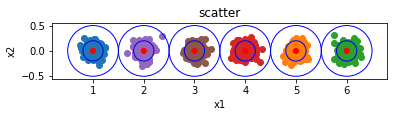

In [5]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

keys_list = list(position_darts.keys())

for i in keys_list:
    value_list = position_darts.get(i)
    value_list_x = []
    value_list_y = []
    for j in range(len(value_list)):
        value_list_x.append(value_list[j][0])
        value_list_y.append(value_list[j][1])
        
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("scatter")
    plt.scatter(value_list_x, value_list_y) 
    
   
    
    ax = plt.axes()

    c1 = patches.Circle(xy=(i, 0), radius=0.05, color='r', fill=True)
    c2 = patches.Circle(xy=(i, 0), radius=0.2, ec='b', fill=False)
    c3 = patches.Circle(xy=(i, 0), radius=0.5, ec='b', fill=False)
    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(c3)

    plt.axis('scaled')
    ax.set_aspect('equal')
    
plt.show()

# 問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。<br>
《ヒント》<br>
ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


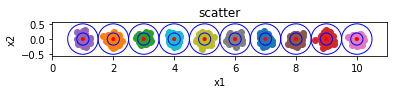

In [6]:
import numpy as np
from collections import defaultdict
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

STD = 0.1    #標準偏差

def darts(n_darts, n_target):
    position_darts = defaultdict(list)
    for i in range(n_darts):
        list_target = list(range(1, n_target + 1))
        roll_dice = np.random.choice(list_target)    #的の数
        xy_normal = []    #　ダーツの座標(x, y)
        xy_normal.append(np.random.normal(roll_dice, STD))    #x座標
        xy_normal.append(np.random.normal(0, STD))    #y座標
        position_darts[roll_dice].append(xy_normal)    #まとの番号と座標を紐付けて辞書へ追加

    keys_list = list(position_darts.keys())
    for i in keys_list:
        value_list = position_darts.get(i)
        value_list_x = []
        value_list_y = []
        for j in range(len(value_list)):
            value_list_x.append(value_list[j][0])
            value_list_y.append(value_list[j][1])

        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title("scatter")
        plt.scatter(value_list_x, value_list_y) 

        ax = plt.axes()

        c1 = patches.Circle(xy=(i, 0), radius=0.05, color='r', fill=True)
        c2 = patches.Circle(xy=(i, 0), radius=0.2, ec='b', fill=False)
        c3 = patches.Circle(xy=(i, 0), radius=0.5, ec='b', fill=False)
        ax.add_patch(c1)
        ax.add_patch(c2)
        ax.add_patch(c3)

        plt.axis('scaled')
        ax.set_aspect('equal')

    plt.show()
    
darts(n_darts=1000, n_target=10)    #ダーツを投げる回数と的の数を引数に設定